In [1]:
import scrapy
#from wiki_demo.items import WikiDemoItem

import re

class FirstLinkSpider(scrapy.Spider):
    name = 'first_link'
    start_urls = ['https://en.wikipedia.org/wiki/Information_retrieval']
    visited_urls = set()
    
    header_selector = 'h1#firstHeading.firstHeading::text'
    body_link_selector = 'div#mw-content-text.mw-content-ltr a::attr("href")'
    allowed_re = re.compile('https://.+\.wikipedia\.org/wiki/'
                            '(?!((File|Talk|Category|Portal|Special|Wikipedia'
                            '|Help|Draft):|Main_Page)).+')
       
    def parse(self, response):
        try:
            yield {
                'title': response.css(self.header_selector).extract_first().encode('utf-8'),
                'url': response.url
            }
        except:
            pass
        self.visited_urls.add(response.url)
        if response.url == 'https://en.wikipedia.org/wiki/Philosophy':
            raise StopIteration

        for link in response.css(self.body_link_selector).extract():
            if link[0] == '#':
                continue
            next_url = response.urljoin(link)
            if self.allowed_re.match(next_url) and not next_url in self.visited_urls:
                yield scrapy.Request(next_url, callback=self.parse)
                break
        

In [2]:
import scrapy
import scrapy.crawler as crawler
process = crawler.CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(FirstLinkSpider)
process.start()

2018-04-12 13:35:52 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
2018-04-12 13:35:52 [scrapy.utils.log] INFO: Versions: lxml 4.1.0.0, libxml2 2.9.4, cssselect 1.0.3, parsel 1.4.0, w3lib 1.19.0, Twisted 17.9.0, Python 3.6.3 |Anaconda custom (64-bit)| (default, Oct 13 2017, 12:02:49) - [GCC 7.2.0], pyOpenSSL 17.2.0 (OpenSSL 1.0.2n  7 Dec 2017), cryptography 2.0.3, Platform Linux-4.13.0-38-generic-x86_64-with-debian-stretch-sid
2018-04-12 13:35:52 [scrapy.crawler] INFO: Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2018-04-12 13:35:52 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2018-04-12 13:35:53 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.

2018-04-12 13:35:57 [scrapy.core.scraper] DEBUG: Scraped from <200 https://en.wikipedia.org/wiki/Victoria_(Australia)>
{'title': b'Victoria (Australia)', 'url': 'https://en.wikipedia.org/wiki/Victoria_(Australia)'}
2018-04-12 13:35:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Flag_of_Victoria> (referer: https://en.wikipedia.org/wiki/Victoria_(Australia))
2018-04-12 13:35:57 [scrapy.core.scraper] DEBUG: Scraped from <200 https://en.wikipedia.org/wiki/Flag_of_Victoria>
{'title': b'Flag of Victoria', 'url': 'https://en.wikipedia.org/wiki/Flag_of_Victoria'}
2018-04-12 13:35:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Glossary_of_vexillology> (referer: https://en.wikipedia.org/wiki/Flag_of_Victoria)
2018-04-12 13:35:58 [scrapy.core.scraper] DEBUG: Scraped from <200 https://en.wikipedia.org/wiki/Glossary_of_vexillology>
{'title': b'Glossary of vexillology', 'url': 'https://en.wikipedia.org/wiki/Glossary_of_vexillology'}
2

2018-04-12 13:36:02 [scrapy.core.scraper] DEBUG: Scraped from <200 https://en.wikipedia.org/wiki/Musical_notation>
{'title': b'Musical notation', 'url': 'https://en.wikipedia.org/wiki/Musical_notation'}
2018-04-12 13:36:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Musical_isomorphism> (referer: https://en.wikipedia.org/wiki/Musical_notation)
2018-04-12 13:36:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://en.wikipedia.org/wiki/Musical_isomorphism>
{'title': b'Musical isomorphism', 'url': 'https://en.wikipedia.org/wiki/Musical_isomorphism'}
2018-04-12 13:36:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Isomorphism> (referer: https://en.wikipedia.org/wiki/Musical_isomorphism)
2018-04-12 13:36:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://en.wikipedia.org/wiki/Isomorphism>
{'title': b'Isomorphism', 'url': 'https://en.wikipedia.org/wiki/Isomorphism'}
2018-04-12 13:36:03 [scrapy.core.engine] DEBUG: Cr

2018-04-12 13:36:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://en.wikipedia.org/wiki/Argentina,_Santiago_del_Estero>
{'title': b'Argentina, Santiago del Estero', 'url': 'https://en.wikipedia.org/wiki/Argentina,_Santiago_del_Estero'}
2018-04-12 13:36:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://es.wikipedia.org/wiki/Argentina_(Santiago_del_Estero)> (referer: https://en.wikipedia.org/wiki/Argentina,_Santiago_del_Estero)
2018-04-12 13:36:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://es.wikipedia.org/wiki/Argentina_(Santiago_del_Estero)>
{'title': b'Argentina (Santiago del Estero)', 'url': 'https://es.wikipedia.org/wiki/Argentina_(Santiago_del_Estero)'}
2018-04-12 13:36:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://es.wikipedia.org/wiki/Archivo:Flag_of_None.svg> (referer: https://es.wikipedia.org/wiki/Argentina_(Santiago_del_Estero))
2018-04-12 13:36:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://es.wikipedia.org/wiki/Archivo:Flag

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import networkx as nx
g = nx.barabasi_albert_graph(1000, 3)
pr = nx.pagerank_numpy(g, alpha=0.85)

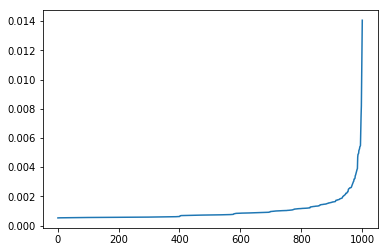

In [4]:
vals = np.sort([el[1] for el in pr.items()])
X = [i+1.0 for i in range(len(vals))]

plt.plot(X, vals*1.0)